In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/train[1].csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
# getting more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
df['gender'].value_counts()


,count
gender,
Female,9446
Male,5857
Other,1


In [ ]:
df['gender'].replace(to_replace='Other', value='Female', inplace=True)
df['gender'].value_counts()

<ipython-input-6-aa727aeab95e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(to_replace='Other', value='Female', inplace=True)


,count
gender,
Female,9447
Male,5857


<Axes: xlabel='gender', ylabel='age'>

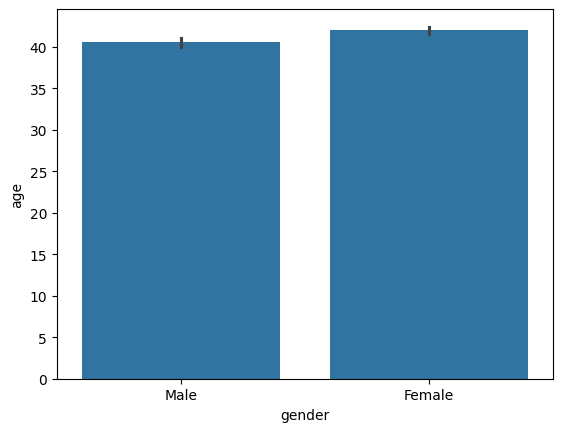

In [ ]:
sns.barplot(x=df['gender'], y=df['age'])

<Axes: xlabel='gender', ylabel='hypertension'>

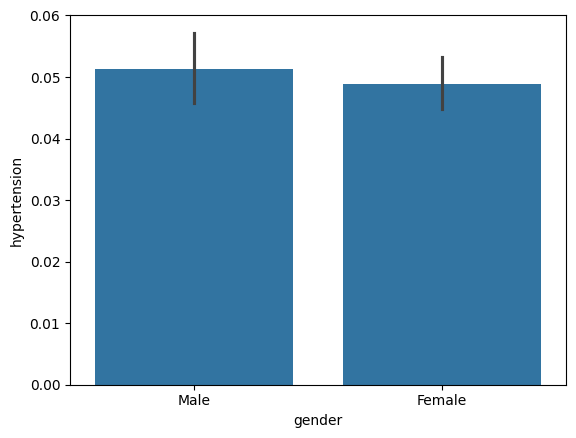

In [ ]:
df['hypertension'].value_counts()
sns.barplot(x=df['gender'], y=df['hypertension'])

<Axes: xlabel='gender', ylabel='heart_disease'>

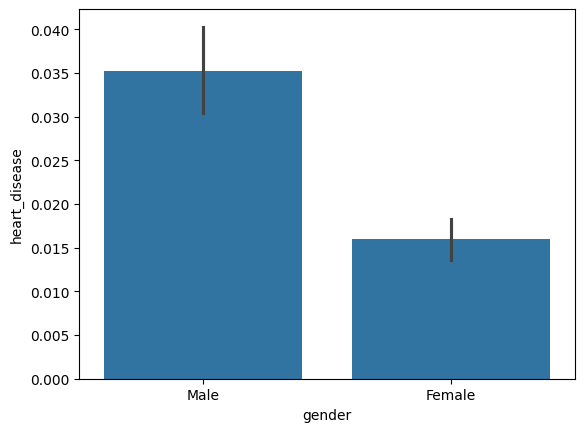

In [ ]:
df['heart_disease'].value_counts()
sns.barplot(x=df['gender'], y=df['heart_disease'])

<Axes: xlabel='stroke', ylabel='count'>

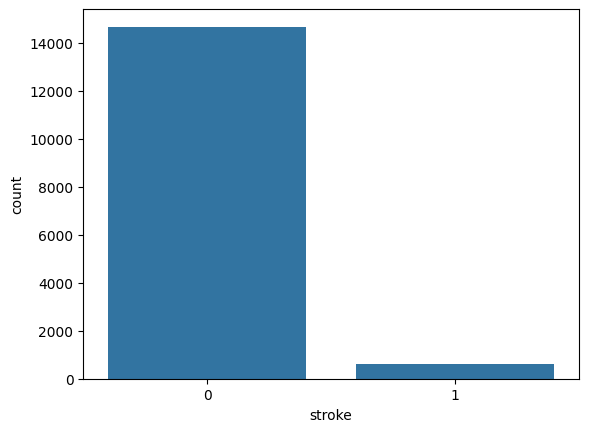

In [ ]:
sns.countplot(x=df['stroke'])

In [ ]:
def show_values(df):
    all_cols = df.columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []

    for col in all_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
    return pd.DataFrame({'Feature Name' : feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val})

In [ ]:
show_values(df)

,Feature Name,Number of Unique Value,Name of Unique Values
0,id,15304,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,gender,2,"[Male, Female]"
2,age,106,"[28.0, 33.0, 42.0, 56.0, 24.0, 34.0, 53.0, 78...."
3,hypertension,2,"[0, 1]"
4,heart_disease,2,"[0, 1]"
5,ever_married,2,"[Yes, No]"
6,work_type,5,"[Private, Self-employed, Govt_job, children, N..."
7,Residence_type,2,"[Urban, Rural]"
8,avg_glucose_level,3740,"[79.53, 78.44, 103.0, 64.87, 73.36, 84.35, 88...."
9,bmi,407,"[31.1, 23.9, 40.3, 28.8, 22.2, 25.3, 24.8, 34...."


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['gender'].replace(to_replace='Female', value=1, inplace=True)
df['gender'].replace(to_replace='Male', value=0, inplace=True)
df['ever_married'].replace(to_replace='Yes', value=1, inplace=True)
df['ever_married'].replace(to_replace='No', value=0, inplace=True)

<ipython-input-14-78b04609e4c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(to_replace='Female', value=1, inplace=True)
<ipython-input-14-78b04609e4c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
#Scaling numerical
numeric_cols = ['age', 'avg_glucose_level','bmi']
for col in numeric_cols:
    df[col] = StandardScaler().fit_transform(df[[col]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cat_col = ['Residence_type', 'smoking_status', 'work_type' ]
# Fit and transform the 'Size' column
for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
y = df['stroke']
X = df.drop(['stroke'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20 )

In [ ]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [ ]:
model_xgb = XGBClassifier()
model_xgb = model_xgb.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
score = 0
for i in range(len(y_test)):
    if y_test.values[i] == predictions[i]:
        score = score +1

print("Accuracy is: ", score/len(y_test))

Accuracy is:  0.9621038876184254


In [ ]:
predictions_xgb = model_xgb.predict(X_test)
score = 0
for i in range(len(y_test)):
    if y_test.values[i] == predictions_xgb[i]:
        score = score +1

print("Accuracy is: ", score/len(y_test))

Accuracy is:  0.9617771969944463


In [ ]:
model_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
predictions_gini = model_gini.predict(X_test)
score = 0
for i in range(len(y_test)):
    if y_test.values[i] == predictions_gini[i]:
        score = score +1

print("Accuracy is: ", score/len(y_test))

Accuracy is:  0.9624305782424044


In [ ]:
# Submission file preparing
df_test = pd.read_csv('/content/test[1].csv')
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [ ]:
df_test['gender'].replace(to_replace='Other', value='Female', inplace=True)
df_test['gender'].value_counts()

<ipython-input-27-1ff785097517>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['gender'].replace(to_replace='Other', value='Female', inplace=True)


,count
gender,
Female,6339
Male,3865


In [ ]:
df_test['gender'].replace(to_replace='Female', value=1, inplace=True)
df_test['gender'].replace(to_replace='Male', value=0, inplace=True)
df_test['ever_married'].replace(to_replace='Yes', value=1, inplace=True)
df_test['ever_married'].replace(to_replace='No', value=0, inplace=True)

<ipython-input-28-f75ee36a2a4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['gender'].replace(to_replace='Female', value=1, inplace=True)
<ipython-input-28-f75ee36a2a4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
#Scaling numerical
numeric_cols = ['age', 'avg_glucose_level','bmi']
for col in numeric_cols:
    df_test[col] = StandardScaler().fit_transform(df_test[[col]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cat_col = ['Residence_type', 'smoking_status', 'work_type' ]
# Fit and transform the 'Size' column
for col in cat_col:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [ ]:
ID = df_test['id']
df_test = df_test.drop(['id'], axis=1)

In [ ]:
predictions_submission = model.predict(df_test)


In [ ]:
output = pd.DataFrame({'id': ID,
                       'stroke': predictions_submission})
output.head()
output.to_csv('submission.csv', index=False)

Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.40      0.06      0.11       130

    accuracy                           0.96      3061
   macro avg       0.68      0.53      0.54      3061
weighted avg       0.94      0.96      0.94      3061



Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gnb = gnb_classifier.predict(X_test)
print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2931
           1       0.21      0.41      0.28       130

    accuracy                           0.91      3061
   macro avg       0.59      0.67      0.61      3061
weighted avg       0.94      0.91      0.92      3061



Support Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svc_classifier = SVC(kernel='linear')  # or use 'rbf' for non-linear
svc_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svc = svc_classifier.predict(X_test)
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.00      0.00      0.00       130

    accuracy                           0.96      3061
   macro avg       0.48      0.50      0.49      3061
weighted avg       0.92      0.96      0.94      3061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and train the model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gb = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.35      0.05      0.08       130

    accuracy                           0.96      3061
   macro avg       0.66      0.52      0.53      3061
weighted avg       0.93      0.96      0.94      3061



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors for optimal performance

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.33      0.05      0.08       130

    accuracy                           0.96      3061
   macro avg       0.65      0.52      0.53      3061
weighted avg       0.93      0.96      0.94      3061

